In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Linear Separable Data Load

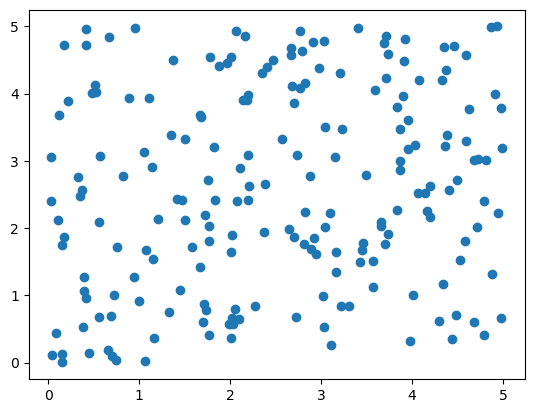

In [52]:
x = pd.read_csv('./XY/x.csv', header=None)
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

y = pd.read_csv('./XY/y.csv', header=None)
y = y.drop(y.columns[0], axis=1)
# header column 0 is Class
y.columns = ['Class']

# plot data
plt.scatter(x['X'], x['Y'])

# Linear Separable Data Secuencial

Epoch 1/100, Accuracy: 0.75
Epoch 2/100, Accuracy: 0.75
Epoch 3/100, Accuracy: 0.75
Epoch 4/100, Accuracy: 0.75
Epoch 5/100, Accuracy: 0.755
Epoch 6/100, Accuracy: 1.0075
Epoch 7/100, Accuracy: 1.035
Epoch 8/100, Accuracy: 1.03
Epoch 9/100, Accuracy: 1.025
Epoch 10/100, Accuracy: 1.0225
Epoch 11/100, Accuracy: 1.0175
Epoch 12/100, Accuracy: 1.02
Epoch 13/100, Accuracy: 1.02
Epoch 14/100, Accuracy: 1.0225
Epoch 15/100, Accuracy: 1.0175
Epoch 16/100, Accuracy: 1.0175
Epoch 17/100, Accuracy: 1.0175
Epoch 18/100, Accuracy: 1.0175
Epoch 19/100, Accuracy: 1.02
Epoch 20/100, Accuracy: 1.02
Epoch 21/100, Accuracy: 1.02
Epoch 22/100, Accuracy: 1.0225
Epoch 23/100, Accuracy: 1.0225
Epoch 24/100, Accuracy: 1.025
Epoch 25/100, Accuracy: 1.0275
Epoch 26/100, Accuracy: 1.0275
Epoch 27/100, Accuracy: 1.0275
Epoch 28/100, Accuracy: 1.0325
Epoch 29/100, Accuracy: 1.0325
Epoch 30/100, Accuracy: 1.0325
Epoch 31/100, Accuracy: 1.0325
Epoch 32/100, Accuracy: 1.0325
Epoch 33/100, Accuracy: 1.0325
Epoch 34/1

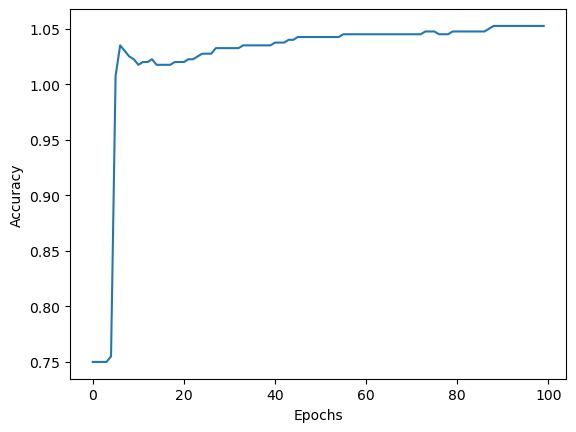

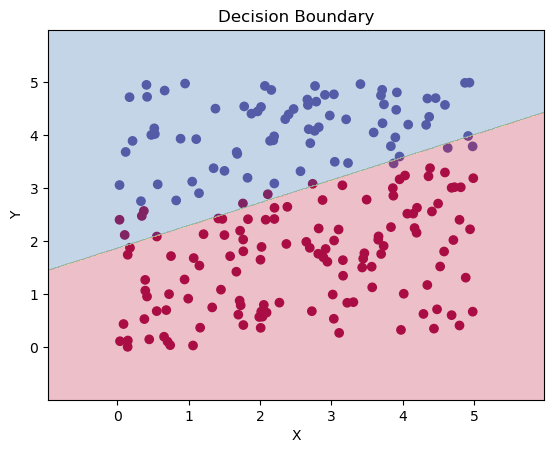

In [53]:
# import a local class
from linear import Perceptron, plot_decision_boundary
# run the perceptron class for 100 epochs, learning rate of 0.01, and random weights
perceptron = Perceptron(epochs=100, learning_rate=0.01, weights=np.random.rand(3))
# data set to numpy array
training_inputs = x.to_numpy()
labels = y.to_numpy()
# train the perceptron
perceptron.train(training_inputs, labels)

# plot accuracy
plt.plot(perceptron.accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# plot decision boundary
plot_decision_boundary(perceptron, training_inputs, labels)

# Linearly Separable Data Batch

Epoch 1/100, Accuracy: 0.375
Epoch 2/100, Accuracy: 0.375
Epoch 3/100, Accuracy: 0.615
Epoch 4/100, Accuracy: 0.665
Epoch 5/100, Accuracy: 0.72
Epoch 6/100, Accuracy: 0.76
Epoch 7/100, Accuracy: 0.775
Epoch 8/100, Accuracy: 0.82
Epoch 9/100, Accuracy: 0.81
Epoch 10/100, Accuracy: 0.82
Epoch 11/100, Accuracy: 0.82
Epoch 12/100, Accuracy: 0.84
Epoch 13/100, Accuracy: 0.825
Epoch 14/100, Accuracy: 0.855
Epoch 15/100, Accuracy: 0.85
Epoch 16/100, Accuracy: 0.86
Epoch 17/100, Accuracy: 0.86
Epoch 18/100, Accuracy: 0.865
Epoch 19/100, Accuracy: 0.87
Epoch 20/100, Accuracy: 0.875
Epoch 21/100, Accuracy: 0.875
Epoch 22/100, Accuracy: 0.88
Epoch 23/100, Accuracy: 0.88
Epoch 24/100, Accuracy: 0.885
Epoch 25/100, Accuracy: 0.885
Epoch 26/100, Accuracy: 0.885
Epoch 27/100, Accuracy: 0.89
Epoch 28/100, Accuracy: 0.89
Epoch 29/100, Accuracy: 0.89
Epoch 30/100, Accuracy: 0.89
Epoch 31/100, Accuracy: 0.895
Epoch 32/100, Accuracy: 0.895
Epoch 33/100, Accuracy: 0.895
Epoch 34/100, Accuracy: 0.895
Epoch 

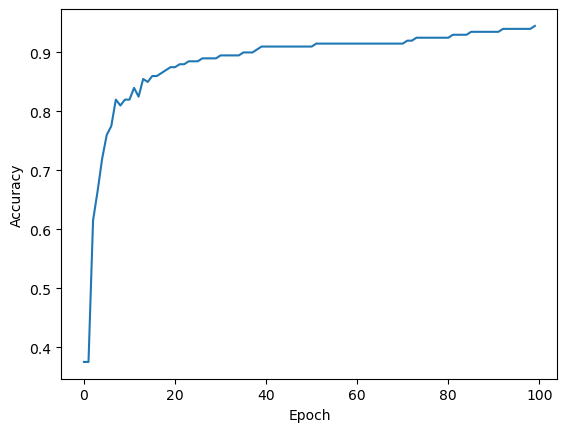

In [54]:
# import a local class
from linear import PerceptronBatch

# run the perceptron class for 100 epochs, learning rate of 0.01, and random weights
perceptron = PerceptronBatch(epochs=100, learning_rate=0.01, weights=np.random.rand(3))
training_inputs = x.to_numpy()
labels = y.to_numpy().flatten()
# train the perceptron
perceptron.train(training_inputs, labels)

# plot accuracy
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# plot decision boundary
plot_decision_boundary(perceptron, training_inputs, labels)


Como se puede ver en las gráficas anteriores, el algoritmo de perceptrón converge en ambos casos, sin embargo, en el caso secuencial alcanzamos un accuracy mayor a 1, mientras que en el caso batch el accuracy es menor. Lo que nos indica que el algoritmo secuencial está sobreajustando los datos, mientras que el algoritmo batch está generalizando mejor.

Por otro lado vemos que en la gráfica del decision boundary, nos damos cuenta que las gráficas son bastante similares, lo que nos indica que el algoritmo secuencial está encontrando un mínimo que es bastante similar al mínimo que encuentra el algoritmo batch, esto nos indica que por más de que la generalización del algoritmo secuencial no sea tan buena, el mínimo que encuentra es correcto.

Hablando un poco sobre los algoritmos en sí el cambio principal lo encontramos en la función train, en el caso secuencial se actualizan los pesos en cada iteración, mientras que en el caso batch se actualizan los pesos al final de cada época una vez que se han calculado todos los errores.
```
        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * prediction * (1 - prediction) * inputs
                self.weights[0] += self.learning_rate * error * prediction * (1 - prediction)

```
```
        for epoch in range(self.epochs):
            predictions = self.predict(training_inputs)
            errors = labels - predictions
            self.weights[1:] += self.learning_rate * np.dot(errors * predictions * (1 - predictions), training_inputs)
            self.weights[0] += self.learning_rate * np.sum(errors * predictions * (1 - predictions))

```

Por otro lado vemos que para ambos casos se utiliza la función de activación sigmoidal esto para mantener la consistencia entre los algoritmos.

# XOR Data Load

In [55]:
x = pd.read_csv('./XOR/XXOR.csv', header=None)
x.columns = ['X', 'Y']

y = pd.read_csv('./XOR/YXOR.csv', header=None)
y.columns = ['Class']

# plot data
plt.scatter(x['X'], x['Y'])

# XOR Data Secuencial

Epoch 1/100, Accuracy: 0.5
Epoch 2/100, Accuracy: 0.5
Epoch 3/100, Accuracy: 0.5
Epoch 4/100, Accuracy: 0.5
Epoch 5/100, Accuracy: 0.5
Epoch 6/100, Accuracy: 0.5
Epoch 7/100, Accuracy: 0.5
Epoch 8/100, Accuracy: 0.5
Epoch 9/100, Accuracy: 0.5
Epoch 10/100, Accuracy: 0.5
Epoch 11/100, Accuracy: 0.5
Epoch 12/100, Accuracy: 0.5
Epoch 13/100, Accuracy: 0.5
Epoch 14/100, Accuracy: 0.5
Epoch 15/100, Accuracy: 0.5
Epoch 16/100, Accuracy: 0.5
Epoch 17/100, Accuracy: 0.5
Epoch 18/100, Accuracy: 0.5
Epoch 19/100, Accuracy: 0.5
Epoch 20/100, Accuracy: 0.5
Epoch 21/100, Accuracy: 0.5
Epoch 22/100, Accuracy: 0.5
Epoch 23/100, Accuracy: 0.5
Epoch 24/100, Accuracy: 0.5
Epoch 25/100, Accuracy: 0.5
Epoch 26/100, Accuracy: 0.5
Epoch 27/100, Accuracy: 0.5
Epoch 28/100, Accuracy: 0.5
Epoch 29/100, Accuracy: 0.5
Epoch 30/100, Accuracy: 0.5
Epoch 31/100, Accuracy: 0.5
Epoch 32/100, Accuracy: 0.5
Epoch 33/100, Accuracy: 0.5
Epoch 34/100, Accuracy: 0.5
Epoch 35/100, Accuracy: 0.5
Epoch 36/100, Accuracy: 0.5
E

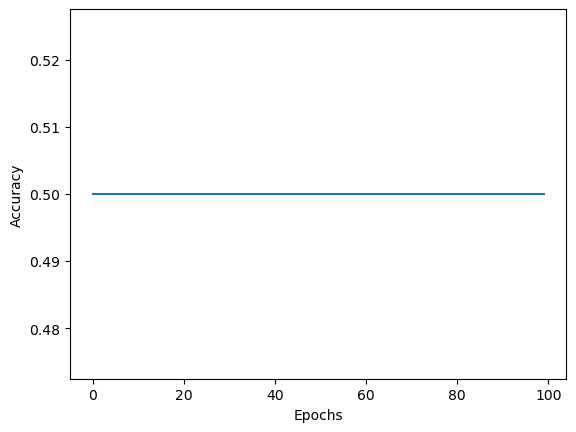

In [56]:
# import a local class
from XOR import PerceptronXOR, plot_decision_boundary
# run the perceptron class for 100 epochs, learning rate of 0.01, and random weights
perceptron = PerceptronXOR(epochs=100, learning_rate=0.01, weights=np.random.rand(3))
# data set to numpy array
training_inputs = x.to_numpy()
labels = y.to_numpy()
# train the perceptron
perceptron.train(training_inputs, labels)

# plot accuracy
plt.plot(perceptron.accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# plot decision boundary
plot_decision_boundary(perceptron, training_inputs, labels)

# XOR Data Batch

Epoch 1/100, Accuracy: 0.5
Epoch 2/100, Accuracy: 0.5
Epoch 3/100, Accuracy: 0.5
Epoch 4/100, Accuracy: 0.5
Epoch 5/100, Accuracy: 0.5
Epoch 6/100, Accuracy: 0.5
Epoch 7/100, Accuracy: 0.5
Epoch 8/100, Accuracy: 0.5
Epoch 9/100, Accuracy: 0.5
Epoch 10/100, Accuracy: 0.5
Epoch 11/100, Accuracy: 0.5
Epoch 12/100, Accuracy: 0.5
Epoch 13/100, Accuracy: 0.5
Epoch 14/100, Accuracy: 0.5
Epoch 15/100, Accuracy: 0.5
Epoch 16/100, Accuracy: 0.5
Epoch 17/100, Accuracy: 0.5
Epoch 18/100, Accuracy: 0.5
Epoch 19/100, Accuracy: 0.5
Epoch 20/100, Accuracy: 0.5
Epoch 21/100, Accuracy: 0.5
Epoch 22/100, Accuracy: 0.5
Epoch 23/100, Accuracy: 0.5
Epoch 24/100, Accuracy: 0.5
Epoch 25/100, Accuracy: 0.5
Epoch 26/100, Accuracy: 0.5
Epoch 27/100, Accuracy: 0.5
Epoch 28/100, Accuracy: 0.5
Epoch 29/100, Accuracy: 0.5
Epoch 30/100, Accuracy: 0.5
Epoch 31/100, Accuracy: 0.5
Epoch 32/100, Accuracy: 0.5
Epoch 33/100, Accuracy: 0.5
Epoch 34/100, Accuracy: 0.5
Epoch 35/100, Accuracy: 0.5
Epoch 36/100, Accuracy: 0.5
E

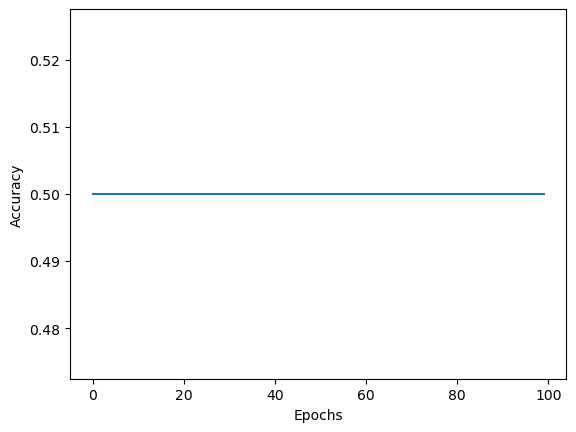

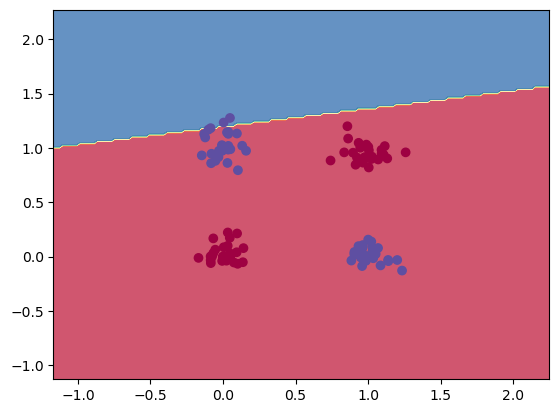

In [57]:
# import a local class
from XOR import PerceptronBatchXOR, plot_decision_boundary
# run the perceptron class for 100 epochs, learning rate of 0.01, and random weights
perceptron = PerceptronBatchXOR(epochs=100, learning_rate=0.01, weights=np.random.rand(3))
# data set to numpy array
training_inputs = x.to_numpy()
labels = y.to_numpy()
# train the perceptron
perceptron.train(training_inputs, labels)

# plot accuracy
plt.plot(perceptron.accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# plot decision boundary
plot_decision_boundary(perceptron, training_inputs, labels)

Como se puede observar en las gráficas, el perceptrón no es capaz de separar los datos de manera correcta, esto se debe a que los datos no son linealmente separables, por lo que el perceptrón no es capaz de separarlos. Como vimos en clase este fue un problema que se presentó en los inicios de la inteligencia artificial, y que fue resuelto con la creación de las redes neuronales, o más específicamente con la creación de las redes neuronales multicapa. Nos dimos cuenta que este problema XOR requiere de un MLP (Multi Layer Perceptron).

# XOR MLP


In [58]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# XOR input data and labels
x_data = x.to_numpy()
y_data = y.to_numpy()

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(2, activation='sigmoid'),  # Hidden layer with 2 neurons and sigmoid activation
    tf.keras.layers.Dense(1, activation='sigmoid')   # Output layer with 1 neuron and sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_data, y_data, epochs=5000, verbose=0)

# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(x_data, y_data)
print(f'Accuracy: {accuracy:.4f}')


# Plot the decision boundary
def plot_decision_boundary(model, x_data, y_data):
    x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
    y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data, cmap=plt.cm.RdYlBu, edgecolors='k', marker='o')

    plt.title('Decision Boundary')
    plt.xlabel('Input Feature 1')
    plt.ylabel('Input Feature 2')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(model, x_data, y_data)


4/4 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 1.0000
Accuracy: 1.0000
3656/3656 [==============================] - 1s 187us/step


En este código extra he querido resolver el problema XOR utilizando un MLP o red neuronal multicapa.
Para esto he usado la librería de TensorFlow, en específico he usado la librería de Keras, la cual nos permite crear redes neuronales de manera sencilla.

Lo que vemos en la gráfica anterior es que el MLP es capaz de separar los datos de manera correcta, esto se debe a que el MLP es capaz de crear una capa oculta que le permite separar los datos de manera correcta. En este caso utilizamos una capa oculta con 2 neuronas, que fue lo que mejor funcionó.

Ademas de que he regresado a usar la función de activación sigmoidal, como en el primer ejercicio, esta función de activación nos permite realizar la clasificación binaria.

Como optimizador he usado el optimizador Adam, el cual es un optimizador que se basa en el descenso de gradiente estocástico, pero que además utiliza un momentum para acelerar el proceso de aprendizaje.

Como función de pérdida he usado la función de entropía cruzada binaria, la cual es la función de pérdida que se usa para clasificación binaria.

Como métrica he usado la métrica de accuracy, para mantener la similitud con el deber.

Lamentablemente 100 épocas no fueron suficientes para que el MLP convergiera, por lo que tuve que aumentar el número de épocas a 5000, lo que nos permite ver que el MLP converge de manera correcta.




# No Linear Separable Data Load

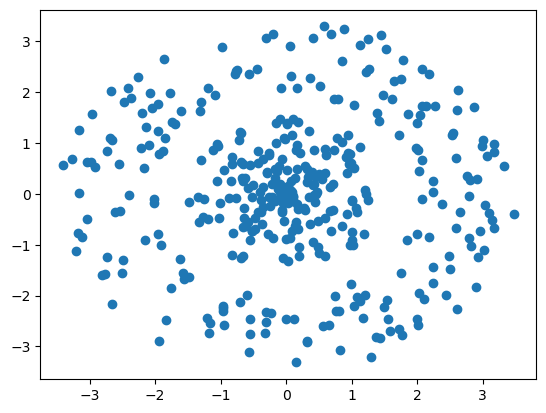

In [59]:
x = pd.read_csv('./NoLinear/Xnonlinear.csv', header=None)
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

y = pd.read_csv('./NoLinear/ynonlinear.csv', header=None)
y = y.drop(y.columns[0], axis=1)
# header column 0 is Class
y.columns = ['Class']

# plot data
plt.scatter(x['X'], x['Y'])

# No Linear Separable Data Secuencial

Epoch: 0 Accuracy: 0.595
Epoch: 1 Accuracy: 0.61
Epoch: 2 Accuracy: 0.64
Epoch: 3 Accuracy: 0.69
Epoch: 4 Accuracy: 0.725
Epoch: 5 Accuracy: 0.77
Epoch: 6 Accuracy: 0.79
Epoch: 7 Accuracy: 0.805
Epoch: 8 Accuracy: 0.815
Epoch: 9 Accuracy: 0.83
Epoch: 10 Accuracy: 0.855
Epoch: 11 Accuracy: 0.865
Epoch: 12 Accuracy: 0.87
Epoch: 13 Accuracy: 0.87
Epoch: 14 Accuracy: 0.88
Epoch: 15 Accuracy: 0.89
Epoch: 16 Accuracy: 0.915
Epoch: 17 Accuracy: 0.915
Epoch: 18 Accuracy: 0.925
Epoch: 19 Accuracy: 0.925
Epoch: 20 Accuracy: 0.93
Epoch: 21 Accuracy: 0.94
Epoch: 22 Accuracy: 0.94
Epoch: 23 Accuracy: 0.94
Epoch: 24 Accuracy: 0.945
Epoch: 25 Accuracy: 0.95
Epoch: 26 Accuracy: 0.96
Epoch: 27 Accuracy: 0.965
Epoch: 28 Accuracy: 0.965
Epoch: 29 Accuracy: 0.97
Epoch: 30 Accuracy: 0.97
Epoch: 31 Accuracy: 0.97
Epoch: 32 Accuracy: 0.975
Epoch: 33 Accuracy: 0.98
Epoch: 34 Accuracy: 0.98
Epoch: 35 Accuracy: 0.985
Epoch: 36 Accuracy: 0.985
Epoch: 37 Accuracy: 0.99
Epoch: 38 Accuracy: 0.99
Epoch: 39 Accuracy:

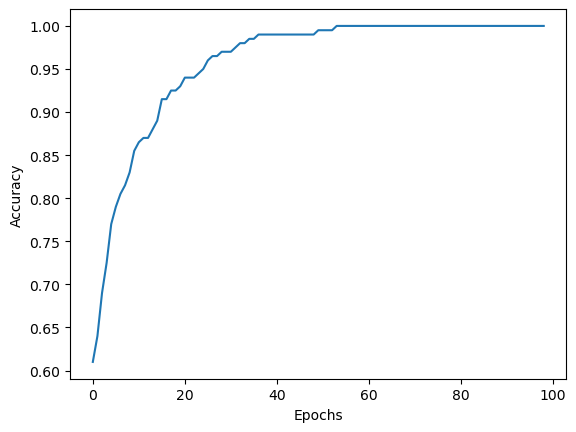

/Users/juancisneros/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


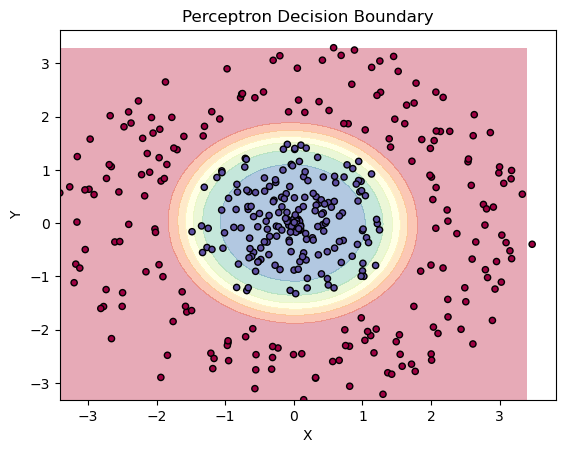

In [60]:
# import a local class
from nolinear import PerceptronNonLinear, plot_decision_boundary
# run the perceptron class for 100 epochs, learning rate of 0.01, and random weights
perceptron = PerceptronNonLinear(epochs=100, learning_rate=0.01, weights=np.random.rand(6))
# Transform the data
poly = PolynomialFeatures(2)
training_inputs = poly.fit_transform(x)
labels = y.values

# train the perceptron
perceptron.train(training_inputs, labels)

# plot accuracy
plt.plot(perceptron.accuracies[1:])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# plot decision boundary
plot_decision_boundary(perceptron, x, y, poly)

# No Linear Separable Data Batch

Epoch: 0 Accuracy: 0.5
Epoch: 1 Accuracy: 0.5
Epoch: 2 Accuracy: 0.5
Epoch: 3 Accuracy: 0.5
Epoch: 4 Accuracy: 0.5
Epoch: 5 Accuracy: 0.5
Epoch: 6 Accuracy: 0.5
Epoch: 7 Accuracy: 0.5
Epoch: 8 Accuracy: 0.5
Epoch: 9 Accuracy: 0.5
Epoch: 10 Accuracy: 0.5
Epoch: 11 Accuracy: 0.5
Epoch: 12 Accuracy: 0.5
Epoch: 13 Accuracy: 0.5
Epoch: 14 Accuracy: 0.5
Epoch: 15 Accuracy: 0.5
Epoch: 16 Accuracy: 0.5
Epoch: 17 Accuracy: 0.5
Epoch: 18 Accuracy: 0.5
Epoch: 19 Accuracy: 0.5
Epoch: 20 Accuracy: 0.5
Epoch: 21 Accuracy: 0.5
Epoch: 22 Accuracy: 0.5
Epoch: 23 Accuracy: 0.5
Epoch: 24 Accuracy: 0.5
Epoch: 25 Accuracy: 0.5
Epoch: 26 Accuracy: 0.5
Epoch: 27 Accuracy: 0.5
Epoch: 28 Accuracy: 0.5
Epoch: 29 Accuracy: 0.5
Epoch: 30 Accuracy: 0.5
Epoch: 31 Accuracy: 0.5
Epoch: 32 Accuracy: 0.5
Epoch: 33 Accuracy: 0.5
Epoch: 34 Accuracy: 0.5
Epoch: 35 Accuracy: 0.5
Epoch: 36 Accuracy: 0.5
Epoch: 37 Accuracy: 0.5
Epoch: 38 Accuracy: 0.5
Epoch: 39 Accuracy: 0.5
Epoch: 40 Accuracy: 0.5
Epoch: 41 Accuracy: 0.5
Ep

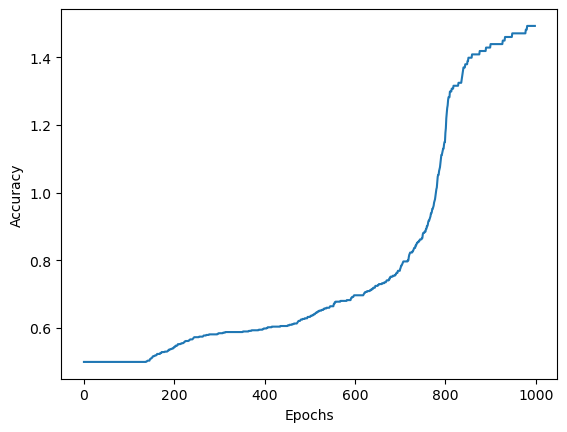

/Users/juancisneros/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


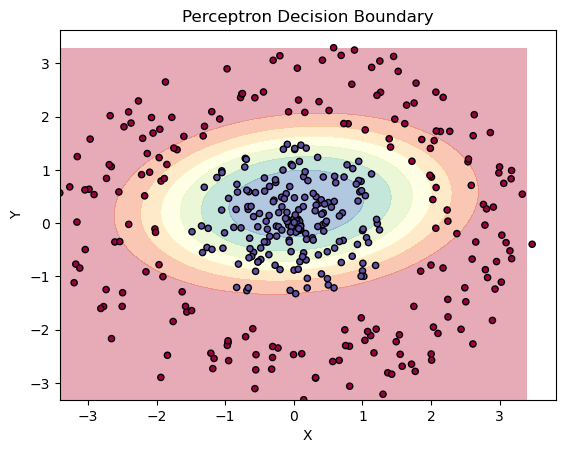

In [61]:
# import a local class
from nolinear import PerceptronNonLinearBatch, plot_decision_boundary
# run the perceptron class for 100 epochs, learning rate of 0.01, and random weights
perceptron = PerceptronNonLinearBatch(epochs=1000, learning_rate=0.01, weights=np.random.rand(6))
# Transform the data
poly = PolynomialFeatures(2)
training_inputs = poly.fit_transform(x)
labels = y.values

# train the perceptron
perceptron.train(training_inputs, labels)

# plot accuracy
plt.plot(perceptron.accuracies[1:])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# plot decision boundary
plot_decision_boundary(perceptron, x, y, poly)

Este ejercicio fue particular en mi caso, yo creería que el Perceptrón Batch no tiene la mejor implementación y por esto es superior el perceptrón secuencial, sin embargo, en este caso los perceptrones logran converger de manera correcta.

En este caso vemos que el Perceptron Batch converge después de 1000 épocas, mientras que el Perceptron Secuencial converge después de 778 épocas.

Este ejercicio tiene la peculiaridad que al no ser linealmente separable, los perceptrones no son capaces de separar los datos de manera correcta, es por esto que he atacado al problema de la siguiente manera:
Sklearn nos permite mediante su objeto PolynomialFeatures, crear nuevas características o features a partir de las características ya existentes, lo que hace esto es ampliar el espacio de características y permitiendo que el modelo pueda aprender patrones más complejos, como curvas y fronteras de decisión no lineales. Pero no todo es tan simple, pues al ampliar el espacio de características, el modelo se vuelve más complejo y por lo tanto más propenso a sobreajustar los datos, en un ejercicio más real podemos usar la técnica de regularización para evitar el sobreajuste, efectivamente como podemos ver en la gráfica, el modelo se sobreajusta a los datos, pero para este ejercicio en concreto puede que no sea un problema debido a el cómo se generaron los datos.



# References

- Yitopeligo. (n.d.). GitHub - yitopeligo/perceptron-training: Perceptron training algorithm implemented in batch mode with python. GitHub. https://github.com/yitopeligo/perceptron-training
- Bharadwaj, P. (2022, March 30). Perceptron Learning and its implementation in Python. Medium. https://towardsdatascience.com/perceptron-and-its-implementation-in-python-f87d6c7aa428
- Verma, S. (2022, January 7). Implementing the Perceptron Algorithm in Python - towards data science. Medium. https://towardsdatascience.com/perceptron-algorithm-in-python-f3ac89d2e537
- Rosebrock, A. (2021, May 12). Implementing the Perceptron Neural Network with Python - PyImageSearch. PyImageSearch. https://pyimagesearch.com/2021/05/06/implementing-the-perceptron-neural-network-with-python/
- Szlchjn. (n.d.). GitHub - szlchjn/xor-sklearn: Solving xor problem using multilayer perceptron regressor in scikit. GitHub. https://github.com/szlchjn/xor-sklearn
- Simple XOR learning with keras. (n.d.). Gist. https://gist.github.com/stewartpark/187895beb89f0a1b3a54
- sklearn.preprocessing.PolynomialFeatures. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

- Grijalva, F. (n.d.). Presentaciones Aprendizaje Automático [PowerPoint Slides].

